In [1]:
# Density Based anomaly detection

In [2]:
from sklearn.datasets import make_circles

In [22]:
X,y = make_circles(n_samples= 750, factor= 0.3, noise= 0.1)

# n_samples = 750 means the function will generate 750 total data points.
# factor = 0.3 means the inner circle radius is 30% of the outer circle.
# noise=0.1, Higher noise → more scattered, less perfect circles.

<Axes: >

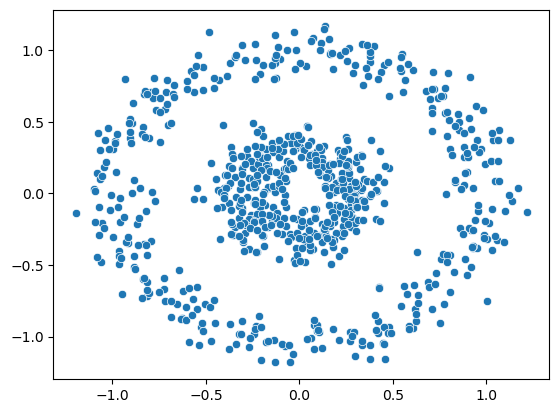

In [23]:
import seaborn as sns

sns.scatterplot(x=X[:,0], y=X[:,1])

In [24]:
# using DBSCAN for checking outliers

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10)

In [25]:
dbscan.fit(X)

DBSCAN(eps=0.2, min_samples=10)

In [26]:
labels= dbscan.labels_
labels

array([ 0,  1,  0,  0,  0,  1,  0,  1,  0,  1,  1,  1,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  1,  0,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,
        0,  0,  0,  0,  1,  0,  0,  1,  0,  1,  1,  1,  0,  1,  1,  0,  1,
        1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,  0,  0,
        1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  1,  0,  1,  0,  1,  1,
        1,  0,  0,  0,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  1,  0,  1,  1,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,  1,
        1,  0,  1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0,
        1,  1,  0,  0,  1,  0,  0,  1,  1,  0,  0,  0,  1,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  0,  0,  1,  0,  1,  0,  1,  1,  1,  1,  1,  0,
        0,  1,  1,  1,  0,  1,  1,  0,  0,  1,  0,  0,  1,  1,  0,  0,  1,
        1,  1,  0,  1,  1,  1,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,  1,
        1,  0,  0,  0,  0

<Axes: >

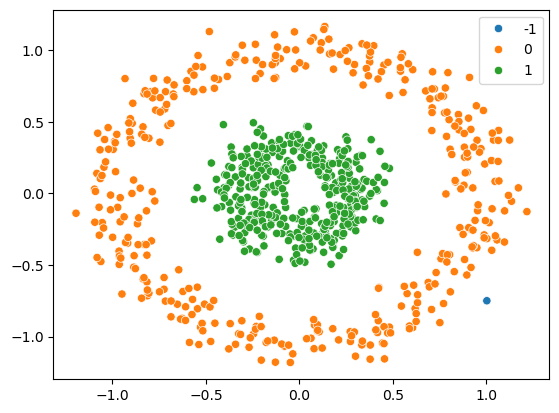

In [27]:
sns.scatterplot(x=X[:,0],y=X[:,1], hue=labels, palette='tab10' )

In [9]:
(labels==-1).sum()

np.int64(15)

In [10]:
import pandas as pd

df = pd.read_csv('cartwiz_transactions.csv')

In [11]:
df

,tx_id,amount,customer_age,account_age_months,location,is_fraud
0,T0001,266.985931,38,103,Los Angeles,0
1,T0002,330.925984,41,117,Chicago,0
2,T0003,632.433368,47,38,New York,0
3,T0004,51.641648,29,58,Los Angeles,0
4,T0005,50.222218,45,60,New York,0
...,...,...,...,...,...,...
495,T0496,24.318174,47,57,Chicago,0
496,T0497,2000.000000,53,25,Chicago,0
497,T0498,351.397026,57,8,Chicago,0
498,T0499,725.281649,57,23,Los Angeles,0


In [12]:
# scale the dataset

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical feature
label_encoder = LabelEncoder()
df['location'] = label_encoder.fit_transform(df['location'])

# Standardize numeric
scaler = StandardScaler()
df[['amount', 'customer_age', 'account_age_months']] = scaler.fit_transform(
    df[['amount', 'customer_age', 'account_age_months']]
)

X_scaled = df[['amount', 'customer_age', 'account_age_months']]

In [13]:
df

,tx_id,amount,customer_age,account_age_months,location,is_fraud
0,T0001,-0.038273,-0.075236,1.202047,2,0
1,T0002,0.035284,0.174994,1.603035,1,0
2,T0003,0.382142,0.675452,-0.659683,4,0
3,T0004,-0.286008,-0.825923,-0.086843,2,0
4,T0005,-0.287641,0.508632,-0.029559,4,0
...,...,...,...,...,...,...
495,T0496,-0.317441,0.675452,-0.115485,1,0
496,T0497,1.955406,1.175910,-1.032028,1,0
497,T0498,0.058834,1.509549,-1.518942,1,0
498,T0499,0.488955,1.509549,-1.089312,2,0


### Density-based methods (DBSCAN)

In [14]:
#DBSCAN

dbscan= DBSCAN(eps=0.2, min_samples=10)

dbscan.fit(df.iloc[:,1:3]) # iloc[:, start: end-1]

DBSCAN(eps=0.2, min_samples=10)

In [15]:
df['is_anomaly_dbscan'] = (dbscan.labels_==-1).astype(int)

df

,tx_id,amount,customer_age,account_age_months,location,is_fraud,is_anomaly_dbscan
0,T0001,-0.038273,-0.075236,1.202047,2,0,0
1,T0002,0.035284,0.174994,1.603035,1,0,0
2,T0003,0.382142,0.675452,-0.659683,4,0,1
3,T0004,-0.286008,-0.825923,-0.086843,2,0,0
4,T0005,-0.287641,0.508632,-0.029559,4,0,0
...,...,...,...,...,...,...,...
495,T0496,-0.317441,0.675452,-0.115485,1,0,0
496,T0497,1.955406,1.175910,-1.032028,1,0,1
497,T0498,0.058834,1.509549,-1.518942,1,0,0
498,T0499,0.488955,1.509549,-1.089312,2,0,1


## Clustering-based Method: K-Means

In [37]:
# fit the model

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

<Axes: xlabel='customer_age', ylabel='account_age_months'>

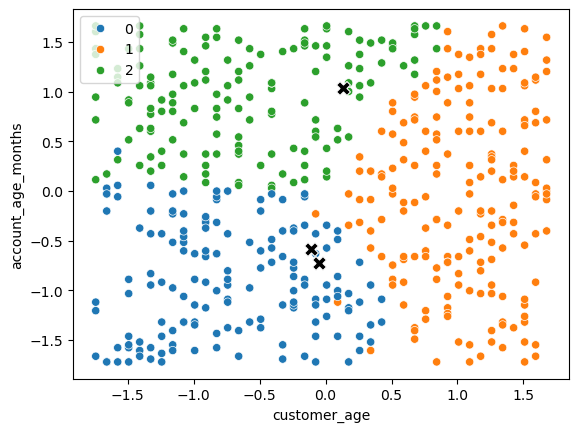

In [38]:
sns.scatterplot(x= X_scaled.iloc[:,1], y = X_scaled.iloc[:,2], hue=km.labels_, palette='tab10')

sns.scatterplot(x=km.cluster_centers_[:, 0], 
                y=km.cluster_centers_[:, 1], 
                s=100, 
                color='black', 
                marker='X')

In [40]:
km.transform(X_scaled)

array([[2.18835322, 1.69004011, 0.56775308],
       [2.64964392, 1.87595438, 1.0033355 ],
       [1.48317727, 0.74071911, 2.11718515],
       ...,
       [2.32365709, 1.53420412, 3.25602555],
       [2.30714467, 1.1874802 , 2.99710963],
       [0.77123494, 2.66929861, 2.06519187]])

In [17]:
# Compute distance to nearest cluster center
import numpy as np

distances = np.min(km.transform(X_scaled), axis=1)
threshold_kmeans = np.percentile(distances, 95)
df['is_anomaly_kmeans'] = (distances > threshold_kmeans).astype(int)

df.head()

,tx_id,amount,customer_age,account_age_months,location,is_fraud,is_anomaly_dbscan,is_anomaly_kmeans
0,T0001,-0.038273,-0.075236,1.202047,2,0,0,0
1,T0002,0.035284,0.174994,1.603035,1,0,0,0
2,T0003,0.382142,0.675452,-0.659683,4,0,1,0
3,T0004,-0.286008,-0.825923,-0.086843,2,0,0,0
4,T0005,-0.287641,0.508632,-0.029559,4,0,0,0


In [41]:
distances 

array([ 0.56775308,  1.0033355 ,  0.74071911,  0.84045037,  0.67184494,
        1.00614959,  0.56899153,  0.4785675 ,  0.38155809,  0.94197568,
        0.54029302,  0.93451869,  1.10683884,  2.35229045,  1.49708324,
        0.7127957 ,  1.07295057,  0.82407803,  0.52602486,  1.34834916,
        0.42948492,  0.75547874,  0.59686504,  1.04804407,  2.49069792,
        1.12171643,  0.83619154,  0.28940469,  1.1012834 ,  0.51954493,
        1.12673735,  0.62341986,  1.04069124,  0.61917402,  1.77463395,
        0.85847246,  1.27720315,  1.59865745,  1.08945305,  1.40361238,
        0.53962832,  1.3286973 ,  0.83717624,  0.97858403,  0.45317494,
        1.19937955,  0.53929312,  0.7652726 ,  0.36977202,  0.83217123,
        1.04118726,  0.80476814,  0.57221712,  0.93672085,  1.11476507,
        0.62762575,  0.88983735,  0.92110627,  0.79031217,  1.06364222,
        0.58158076,  0.94965643,  1.26315574,  0.8883063 ,  0.30192008,
        0.78040469,  0.69867907,  0.9974597 ,  1.72024894,  0.88

In [36]:
km.transform(X_scaled)

array([[2.18835322, 1.69004011, 0.56775308],
       [2.64964392, 1.87595438, 1.0033355 ],
       [1.48317727, 0.74071911, 2.11718515],
       ...,
       [2.32365709, 1.53420412, 3.25602555],
       [2.30714467, 1.1874802 , 2.99710963],
       [0.77123494, 2.66929861, 2.06519187]])

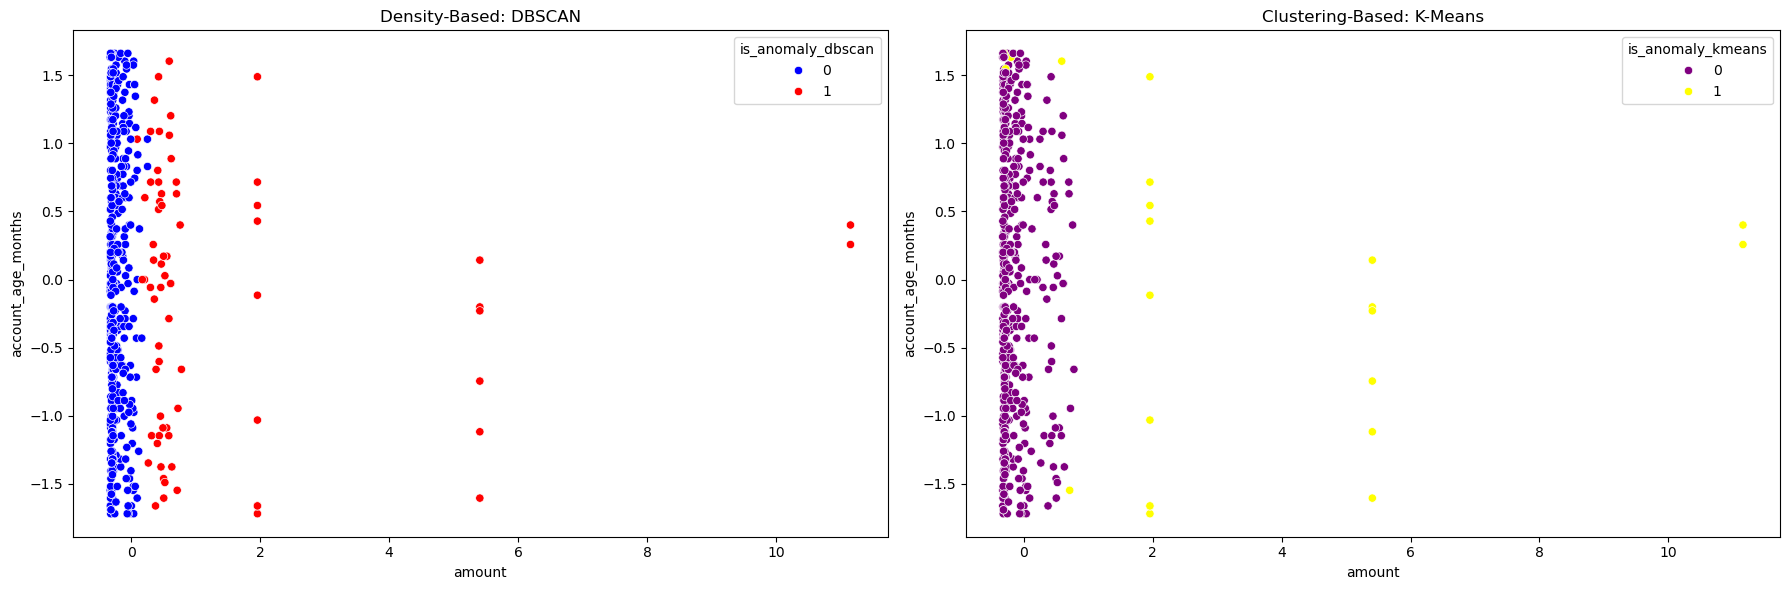

In [18]:
# plot their graphs
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize=(18,6))

sns.scatterplot(
    data=df, x='amount', y='account_age_months',
    hue='is_anomaly_dbscan', palette={0: 'blue', 1: 'red'}, ax=axes[0]
)
axes[0].set_title("Density-Based: DBSCAN")

sns.scatterplot(
    data=df, x='amount', y='account_age_months',
    hue='is_anomaly_kmeans', palette={0: 'purple', 1: 'yellow'}, ax=axes[1]
)
axes[1].set_title("Clustering-Based: K-Means")

plt.tight_layout()
plt.show()